# Implementation of ConvNets
-------------------------------------
**By: Aveontae Frazier**

#### Binary Classification Design
In this project, I was motivated to try binary classification of huskies versus wolves. I felt like this would present a unique challenge and provide me with the opportunity to try different modeling strategies. Since huskies inherit many traits from their ancestor, the wolf, I was concerned about whether they could be classified with high accuracy (>90%). I sampled a few images and quickly realized the challenge of this classification problem because I, too, struggled to identify the distinguishing features of the species. I am also curious whether the convolutional network I build can accurately classify my husky, Thena.

Let's dive in! 😀

*By the way, just change the image paths to your google drive and this script will run for you! See what accuracy you can get :) \
If you do, it is probably a good idea to remove bad images before modeling.*

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Required libraries
import pandas as pd
import numpy as np
import math as math
import matplotlib
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dropout, Dense, Conv2D, MaxPooling2D
from keras import layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Binge Image Generation

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images # Create directory for generated images

In [ ]:
# ~300 is the max that I can download before encountering errors
# I added a few more samples just in case some do not upload properly
from bing_image_downloader import downloader
downloader.download("Wolf in the Wild", limit=330,  output_dir='images', adult_filter_off=True, force_replace=False) # Added 'in the Wild' to the query to prevent too many animated image downloads

[%] Downloading Images to /content/images/Wolf in the Wild


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://onewildthing.co.uk/wp-content/uploads/2020/07/Grey-Wolf-Close-Up.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://d.newsweek.com/en/full/1989164/wolf-howling.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.wallpaperflare.com/static/395/696/51/wolf-animal-wild-nature-wallpaper.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.wildnatureimages.com/images/xl/100814-168-Wild-Wolf.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.redd.it/uz7r2ca2zj461.jpg
[!] Issue getting: https://i.redd.it/uz7r2ca2zj461.jpg
[!] Error:: HTTP Error 403: Blocked
[%] Downloading Image #5 from https://wallpapercave.com/wp/wp8706252.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://wallup.net/wp-content/uploads/2016/01/164522-wolf-animals-nature-wildlife.jpg
[%] File Down

In [ ]:
downloader.download("Siberian Husky in Nature", limit=330,  output_dir='images', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/images/Siberian Husky in Nature


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://wallup.net/wp-content/uploads/2016/01/290627-Siberian_Husky-animals-dog-nature-forest-trees.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://thumbs.dreamstime.com/b/dog-siberian-husky-breed-sits-high-mountains-nature-163164469.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.suwalls.com/wallpapers/animals/siberian-husky-in-the-forest-22497-2560x1600.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://inspirationseek.com/wp-content/uploads/2014/09/Siberian-Husky-Nature-Wallpaper.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://get.wallhere.com/photo/mountains-animals-snow-Siberian-Husky-dog-1235775.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://thumbs.dreamstime.com/b/siberian-husky-nature-park-autumn-69991753.jpg
[%] File Downloaded !

[%] Downl

In [ ]:
!ls images/ -alrt

total 36
drwxr-xr-x 1 root root  4096 Mar  7 09:49  ..
drwxr-xr-x 2 root root 12288 Mar  7 09:54 'Wolf in the Wild'
drwxr-xr-x 4 root root  4096 Mar  7 09:54  .
drwxr-xr-x 2 root root 16384 Mar  7 10:02 'Siberian Husky in Nature'


In [ ]:
!ls '/content/images/Wolf in the Wild'

Image_100.jpg	Image_150.jpg	Image_1.jpg	Image_24.jpg	Image_29.png	Image_50.jpg
Image_101.jpg	Image_151.jpg	Image_200.jpg	Image_250.jpg	Image_2.jpg	Image_51.jpg
Image_102.jpg	Image_152.jpg	Image_201.jpg	Image_251.jpg	Image_300.jpg	Image_52.jpg
Image_103.jpg	Image_153.jpg	Image_202.jpg	Image_252.jpg	Image_301.jpeg	Image_53.jpg
Image_104.jpg	Image_154.jpg	Image_203.jpg	Image_253.jpg	Image_302.jpg	Image_54.jpg
Image_105.jpg	Image_155.jpg	Image_204.jpg	Image_254.jpg	Image_303.jpg	Image_55.jpg
Image_106.jpg	Image_156.jpg	Image_205.jpg	Image_255.jpg	Image_304.jpg	Image_56.jpg
Image_107.jpg	Image_157.jpg	Image_206.png	Image_256.jpg	Image_305.JPG	Image_57.jpg
Image_108.jpg	Image_158.jpg	Image_207.jpg	Image_257.jpg	Image_306.jpeg	Image_58.jpg
Image_109.jpg	Image_159.jpg	Image_208.jpg	Image_258.jpg	Image_307.jpg	Image_59.jpg
Image_10.jpg	Image_15.jpg	Image_209.jpg	Image_259.jpg	Image_308.jpg	Image_5.jpg
Image_110.jpg	Image_160.jpg	Image_20.jpg	Image_25.jpg	Image_309.jpg	Image_60.jpg
Image_111.jpg

In [ ]:
!ls '/content/images/Siberian Husky in Nature'

Image_100.jpg  Image_150.jpg   Image_1.jpg     Image_24.jpg    Image_29.jpg    Image_50.jpg
Image_101.jpg  Image_151.jpg   Image_200.jpg   Image_250.jpg   Image_2.jpg     Image_51.jpg
Image_102.png  Image_152.jpg   Image_201.jpg   Image_251.jpg   Image_300.jpg   Image_52.jpg
Image_103.jpg  Image_153.jpg   Image_202.jpg   Image_252.jpg   Image_301.jpg   Image_53.jpg
Image_104.jpg  Image_154.jpg   Image_203.jpg   Image_253.jpg   Image_302.jpg   Image_54.jpg
Image_105.jpg  Image_155.jpg   Image_204.jpg   Image_254.jpg   Image_303.jpg   Image_55.jpg
Image_106.jpg  Image_156.jpg   Image_205.jpg   Image_255.webp  Image_304.jpg   Image_56.jpg
Image_107.jpg  Image_157.jpg   Image_206.jpg   Image_256.jpg   Image_305.jpg   Image_57.jpg
Image_108.jpg  Image_158.jpg   Image_207.jpg   Image_257.jpg   Image_306.jpg   Image_58.jpg
Image_109.jpg  Image_159.jpg   Image_208.jpg   Image_258.jpg   Image_307.jpg   Image_59.jpg
Image_10.jpg   Image_15.jpg    Image_209.jpg   Image_259.jpg   Image_308.jpg   I

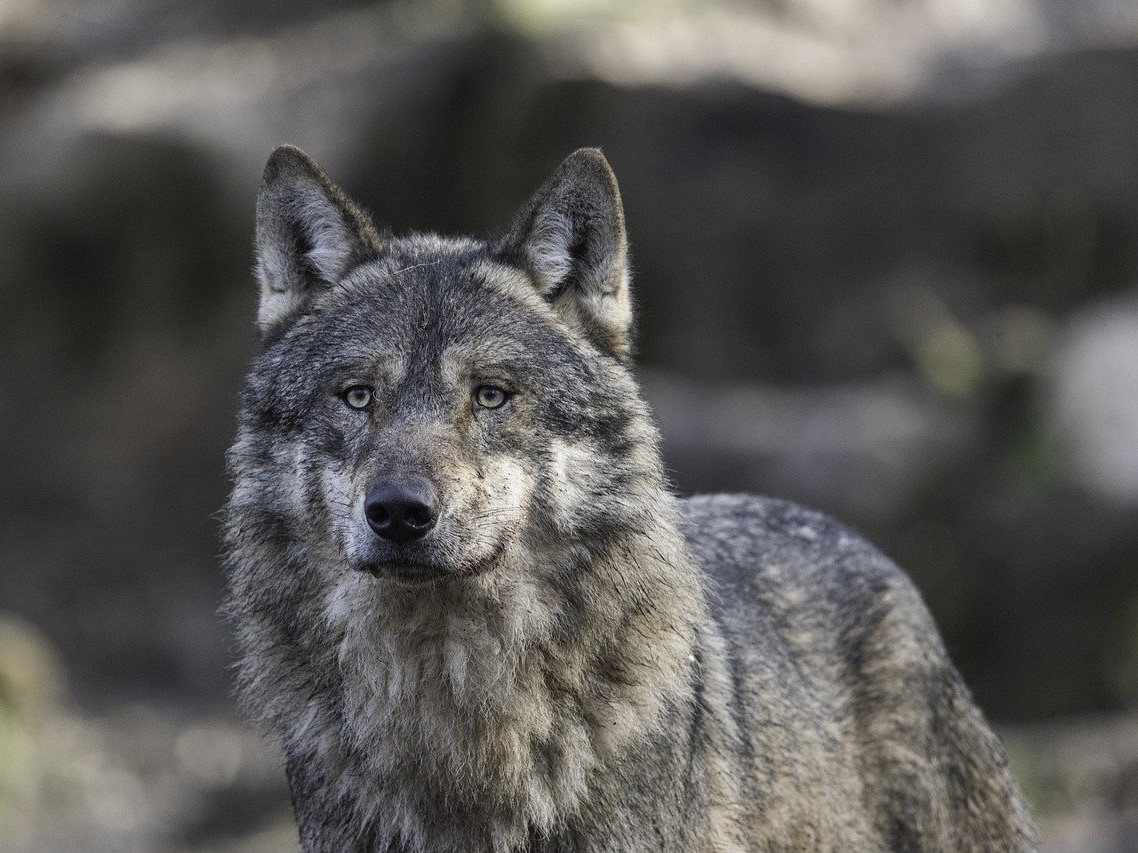

In [ ]:
from IPython.display import Image
Image("/content/images/Wolf in the Wild/Image_1.jpg")

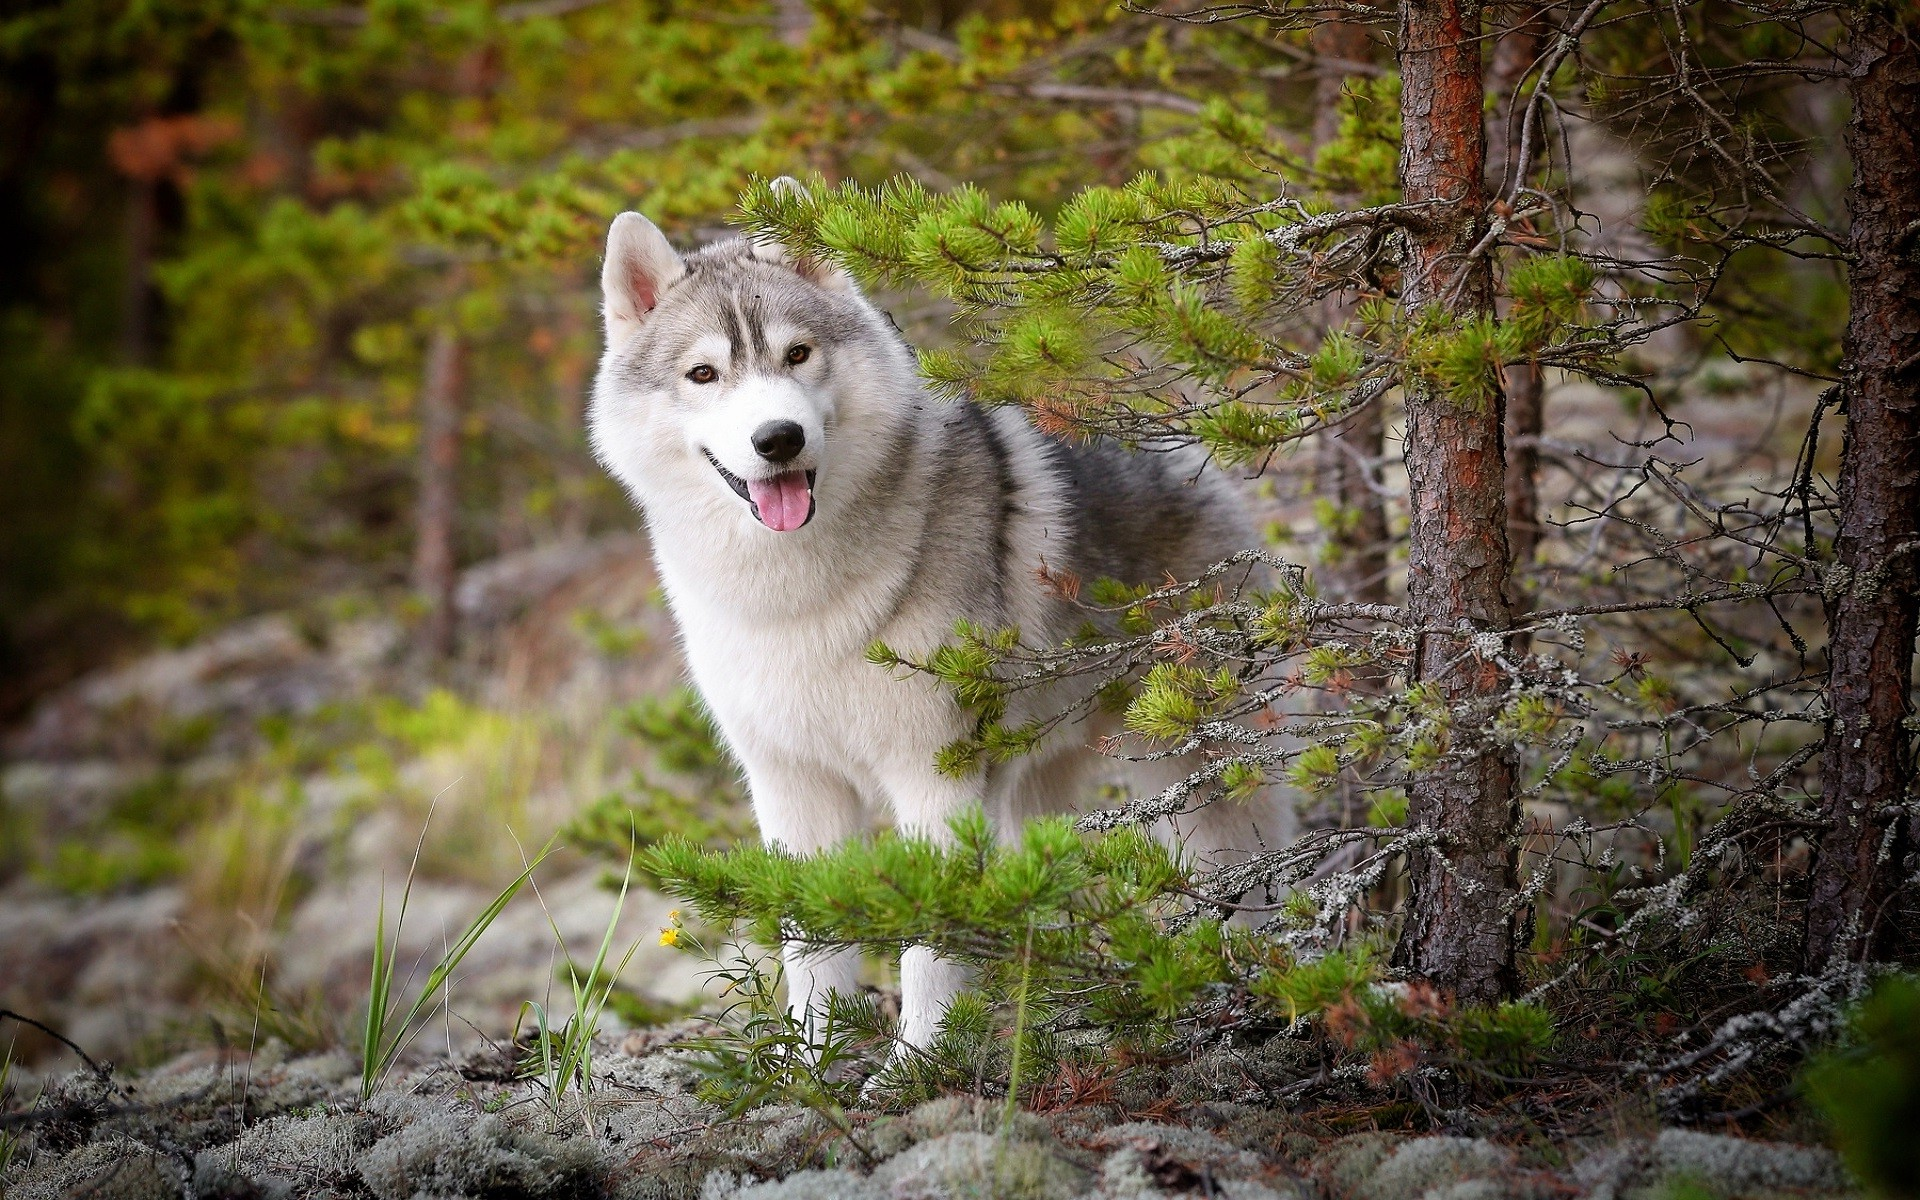

In [ ]:
Image("/content/images/Siberian Husky in Nature/Image_1.jpg")

# Load images into array

In [ ]:
from six import BytesIO
from PIL import Image
import glob
import os

from io import BytesIO

def load_image_into_numpy_array(path):
    image = Image.open(path).convert("RGB")  # Ensures the image is in RGB mode
    return np.array(image, dtype=np.uint8)  # Directly convert to NumPy array

In [ ]:
import glob

wolf_image_path = "/content/images/Wolf in the Wild/*.*"
wolf_images_np = []

for iname in glob.glob(wolf_image_path):
    if iname.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".gif")):
        try:
            wolf_images_np.append(load_image_into_numpy_array(iname))
        except Exception as e:
            print(f"An error occurred for {iname}: {e}")
    else:
        print(f"Skipping non-image file: {iname}")

print(f"Loaded {len(wolf_images_np)} images.")


Skipping non-image file: /content/images/Wolf in the Wild/Image_211.webp
Skipping non-image file: /content/images/Wolf in the Wild/Image_197.webp
Loaded 328 images.


In [ ]:
husky_image_path = "/content/images/Siberian Husky in Nature/*.*"
husky_images_np = []

for iname in glob.glob(husky_image_path):
    if iname.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".gif")):
        try:
            husky_images_np.append(load_image_into_numpy_array(iname))
        except Exception as e:
            print(f"An error occurred for {iname}: {e}")
    else:
        print(f"Skipping non-image file: {iname}")

print(f"Loaded {len(husky_images_np)} images.")

Skipping non-image file: /content/images/Siberian Husky in Nature/Image_255.webp
Skipping non-image file: /content/images/Siberian Husky in Nature/Image_180.webp
Skipping non-image file: /content/images/Siberian Husky in Nature/Image_260.webp
Loaded 327 images.


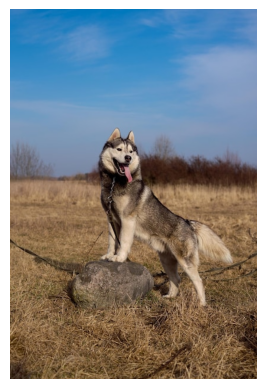

In [ ]:
import matplotlib.pyplot as plt

# Select the first image from the list if images were loaded
if husky_images_np:
    plt.imshow(husky_images_np[0])  # Show the first image
    plt.axis("off")  # Hide axes
    plt.show()
else:
    print("No images were loaded.")

# Set up google drive train/test directories



In [ ]:
base_dir = '/content/drive/MyDrive/data-science-projects/data/'
cat_classes = ['Wolf','Husky'] # class labels

# Train
string = (base_dir, 'train')
s = ''
train_dir = s.join(string)

tf.io.gfile.mkdir(train_dir)

# Test
string = (base_dir, 'test')
s = ''
test_dir = s.join(string)

tf.io.gfile.mkdir(test_dir)

In [ ]:
# Train
base_dir = '/content/drive/MyDrive/data-science-projects/data/train/' #added train

for i in cat_classes:
  string = (base_dir, str(i))
  s = ''
  train_dir = s.join(string)

  tf.io.gfile.mkdir(train_dir)

In [ ]:
# Test
base_dir = '/content/drive/MyDrive/data-science-projects/data/test/' #added test

for i in cat_classes:
  string = (base_dir, str(i))
  s = ''
  test_dir = s.join(string)

  tf.io.gfile.mkdir(test_dir)

# Save images

In [ ]:
# Wolf Training Images
for i in range(256): # approximately 80%
  print(i)
  base_dir = '/content/drive/MyDrive/data-science-projects/data/train/' # train

  im = Image.fromarray(wolf_images_np[i])
  im

  string = (base_dir, cat_classes[0], '/', str(i), '.jpg')
  s = ''
  path = s.join(string)
  print(path)
  im.save(path)

0
/content/drive/MyDrive/data-science-projects/data/train/Wolf/0.jpg
1
/content/drive/MyDrive/data-science-projects/data/train/Wolf/1.jpg
2
/content/drive/MyDrive/data-science-projects/data/train/Wolf/2.jpg
3
/content/drive/MyDrive/data-science-projects/data/train/Wolf/3.jpg
4
/content/drive/MyDrive/data-science-projects/data/train/Wolf/4.jpg
5
/content/drive/MyDrive/data-science-projects/data/train/Wolf/5.jpg
6
/content/drive/MyDrive/data-science-projects/data/train/Wolf/6.jpg
7
/content/drive/MyDrive/data-science-projects/data/train/Wolf/7.jpg
8
/content/drive/MyDrive/data-science-projects/data/train/Wolf/8.jpg
9
/content/drive/MyDrive/data-science-projects/data/train/Wolf/9.jpg
10
/content/drive/MyDrive/data-science-projects/data/train/Wolf/10.jpg
11
/content/drive/MyDrive/data-science-projects/data/train/Wolf/11.jpg
12
/content/drive/MyDrive/data-science-projects/data/train/Wolf/12.jpg
13
/content/drive/MyDrive/data-science-projects/data/train/Wolf/13.jpg
14
/content/drive/MyDrive/

In [ ]:
# Husky Training Images
for i in range(256): # approximately 80%
  print(i)
  base_dir = '/content/drive/MyDrive/data-science-projects/data/train/' # train

  im = Image.fromarray(husky_images_np[i])
  im

  string = (base_dir, cat_classes[1], '/', str(i), '.jpg')
  s = ''
  path = s.join(string)
  print(path)
  im.save(path)

0
/content/drive/MyDrive/data-science-projects/data/train/Husky/0.jpg
1
/content/drive/MyDrive/data-science-projects/data/train/Husky/1.jpg
2
/content/drive/MyDrive/data-science-projects/data/train/Husky/2.jpg
3
/content/drive/MyDrive/data-science-projects/data/train/Husky/3.jpg
4
/content/drive/MyDrive/data-science-projects/data/train/Husky/4.jpg
5
/content/drive/MyDrive/data-science-projects/data/train/Husky/5.jpg
6
/content/drive/MyDrive/data-science-projects/data/train/Husky/6.jpg
7
/content/drive/MyDrive/data-science-projects/data/train/Husky/7.jpg
8
/content/drive/MyDrive/data-science-projects/data/train/Husky/8.jpg
9
/content/drive/MyDrive/data-science-projects/data/train/Husky/9.jpg
10
/content/drive/MyDrive/data-science-projects/data/train/Husky/10.jpg
11
/content/drive/MyDrive/data-science-projects/data/train/Husky/11.jpg
12
/content/drive/MyDrive/data-science-projects/data/train/Husky/12.jpg
13
/content/drive/MyDrive/data-science-projects/data/train/Husky/13.jpg
14
/content/

In [ ]:
# Wolf Test Images
for i in range(256, len(wolf_images_np)): # loop over remaining images
  print(i)
  base_dir = '/content/drive/MyDrive/data-science-projects/data/test/' # test

  im = Image.fromarray(wolf_images_np[i])
  im

  string = (base_dir, cat_classes[0], '/', str(i), '.jpg')
  s = ''
  path = s.join(string)
  print(path)
  im.save(path)

256
/content/drive/MyDrive/data-science-projects/data/test/Wolf/256.jpg
257
/content/drive/MyDrive/data-science-projects/data/test/Wolf/257.jpg
258
/content/drive/MyDrive/data-science-projects/data/test/Wolf/258.jpg
259
/content/drive/MyDrive/data-science-projects/data/test/Wolf/259.jpg
260
/content/drive/MyDrive/data-science-projects/data/test/Wolf/260.jpg
261
/content/drive/MyDrive/data-science-projects/data/test/Wolf/261.jpg
262
/content/drive/MyDrive/data-science-projects/data/test/Wolf/262.jpg
263
/content/drive/MyDrive/data-science-projects/data/test/Wolf/263.jpg
264
/content/drive/MyDrive/data-science-projects/data/test/Wolf/264.jpg
265
/content/drive/MyDrive/data-science-projects/data/test/Wolf/265.jpg
266
/content/drive/MyDrive/data-science-projects/data/test/Wolf/266.jpg
267
/content/drive/MyDrive/data-science-projects/data/test/Wolf/267.jpg
268
/content/drive/MyDrive/data-science-projects/data/test/Wolf/268.jpg
269
/content/drive/MyDrive/data-science-projects/data/test/Wolf/

In [ ]:
# Wolf Test Images
for i in range(256, len(husky_images_np)): # loop over remaining images
  print(i)
  base_dir = '/content/drive/MyDrive/data-science-projects/data/test/' # test

  im = Image.fromarray(husky_images_np[i])
  im

  string = (base_dir, cat_classes[1], '/', str(i), '.jpg')
  s = ''
  path = s.join(string)
  print(path)
  im.save(path)

256
/content/drive/MyDrive/data-science-projects/data/test/Husky/256.jpg
257
/content/drive/MyDrive/data-science-projects/data/test/Husky/257.jpg
258
/content/drive/MyDrive/data-science-projects/data/test/Husky/258.jpg
259
/content/drive/MyDrive/data-science-projects/data/test/Husky/259.jpg
260
/content/drive/MyDrive/data-science-projects/data/test/Husky/260.jpg
261
/content/drive/MyDrive/data-science-projects/data/test/Husky/261.jpg
262
/content/drive/MyDrive/data-science-projects/data/test/Husky/262.jpg
263
/content/drive/MyDrive/data-science-projects/data/test/Husky/263.jpg
264
/content/drive/MyDrive/data-science-projects/data/test/Husky/264.jpg
265
/content/drive/MyDrive/data-science-projects/data/test/Husky/265.jpg
266
/content/drive/MyDrive/data-science-projects/data/test/Husky/266.jpg
267
/content/drive/MyDrive/data-science-projects/data/test/Husky/267.jpg
268
/content/drive/MyDrive/data-science-projects/data/test/Husky/268.jpg
269
/content/drive/MyDrive/data-science-projects/da

*In an attempt to clean the data before modeling, I removed a few images that were completely unrelated to Huskies or Wolves. As the saying goes, garbage in, garbage out.*

In [ ]:
import os

# Define the base directory where train and test partitions are stored
base_dir = '/content/drive/MyDrive/data-science-projects/data/'

# Define partitions and categories
partitions = ['train', 'test']
categories = ['Wolf', 'Husky']

# Dictionary to store image counts
image_counts = {}

# Loop through partitions and categories
for partition in partitions:
    for category in categories:
        dir_path = os.path.join(base_dir, partition, category)
        if os.path.exists(dir_path):  # Ensure the directory exists
            num_images = len([f for f in os.listdir(dir_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
            image_counts[f"{partition}/{category}"] = num_images
        else:
            image_counts[f"{partition}/{category}"] = 0  # If the directory is missing

# Print image counts for each category in train and test
for key, count in image_counts.items():
    print(f"Number of images in {key}: {count}")

Number of images in train/Wolf: 253
Number of images in train/Husky: 253
Number of images in test/Wolf: 70
Number of images in test/Husky: 70


In [ ]:
print(f'The Wolf and Husky split after removing irrelevant images is {253/(70+253)*100:.2f}% train and {(1-(253/(70+253)))*100:.2f}% test.')

The Wolf and Husky split after removing irrelevant images is 78.33% train and 21.67% test.


# Set up paths to read data

In [1]:
path = '/content/drive/MyDrive/data-science-projects/data/'

train_dir = path + 'train'
test_dir = path + 'test'

In [2]:
train_dir

'/content/drive/MyDrive/data-science-projects/data/train'

# Build ConvNet

In [3]:
from keras import backend as K
K.clear_session()

In [6]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.50)) # 50% droput
model.add(layers.Dense(1064, activation='relu'))
model.add(layers.Dropout(0.25)) #25% droput
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1064)                │       2,180,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1064)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         545,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,425,577 (16.88 MB)

 Trainable params: 4,425,577 (16.88 MB)

 Non-trainable params: 0 (0.00 B)

That is a lot of trainable parameters‼

# Data Augmentation and Generator

In [18]:
# Data Augmentation
# These are some pretty decent transformations!
train_datagen = ImageDataGenerator(
    rescale=1./255, # rescale all images [0,1]
    rotation_range=40, # randomly rotate pictures
    width_shift_range=0.2, # randomly translate pictures horizontally
    height_shift_range=0.2, # randomly translate pictures vertically
    shear_range=0.2, #  randomly applying shearing transformations
    zoom_range=0.2, # randomly apply zooming
    horizontal_flip=True # randomly flip image horizontally
)

test_datagen = ImageDataGenerator(rescale=1./255) # test should not be augmented

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # resize every imahge to 150x150
    batch_size = 46,
    class_mode='binary', # need labels for binary_crossentropy
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size = 14,
    class_mode='binary',
    shuffle=True
)

Found 506 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [20]:
for data_batch, label_batch in train_generator:
  print(f'Data batch shape: {data_batch.shape}')
  print(f'Label batch shape: {label_batch.shape}')
  break

Data batch shape: (46, 150, 150, 3)
Label batch shape: (46,)


In [21]:
label_batch # inspect batch

array([0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.], dtype=float32)

In [22]:
# Number of images
train_num_img = len(train_generator.filepaths)
test_num_img = len(test_generator.filepaths)

# Steps per epoch
train_steps_per_epoch = train_num_img // train_generator.batch_size
test_steps_per_epoch = test_num_img // test_generator.batch_size

print(f"Train steps per epoch: {train_steps_per_epoch} \nTest steps per epoch: {test_steps_per_epoch}")

Train steps per epoch: 11 
Test steps per epoch: 10


# Compile "Simple" Convolutional Model

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Will implement earlystopping.

In [ ]:
es = EarlyStopping(
    monitor='val_accuracy',
    mode='max', # maximize val_acc since I curated a balanced dataset
    patience=100, # takes a bit to converge
    restore_best_weights=True # always restore the best weights
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=10000000,
    callbacks=[es],
    validation_data=test_generator,
    validation_steps=test_steps_per_epoch
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10000000
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4827 - loss: 0.7011 - val_accuracy: 0.6071 - val_loss: 0.6916
Epoch 2/10000000
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 986ms/step - accuracy: 0.5569 - loss: 0.6895 - val_accuracy: 0.5786 - val_loss: 0.6565
Epoch 3/10000000
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6126 - loss: 0.6623 - val_accuracy: 0.6786 - val_loss: 0.6279
Epoch 4/10000000
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 996ms/step - accuracy: 0.6344 - loss: 0.6514 - val_accuracy: 0.7143 - val_loss: 0.5668
Epoch 5/10000000
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6748 - loss: 0.6105 - val_accuracy: 0.5286 - val_loss: 0.6657
Epoch 6/10000000
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5757 - loss: 0.6681 - val_accuracy: 0.5857 - val_loss: 0.6689
Epoch 7/10000000
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6671 - loss: 0.6642 - val_accuracy: 0.7000 - val_loss: 0.5861
Epoch 8/10000000
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 996ms/step - accuracy:

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

# Learning Curves

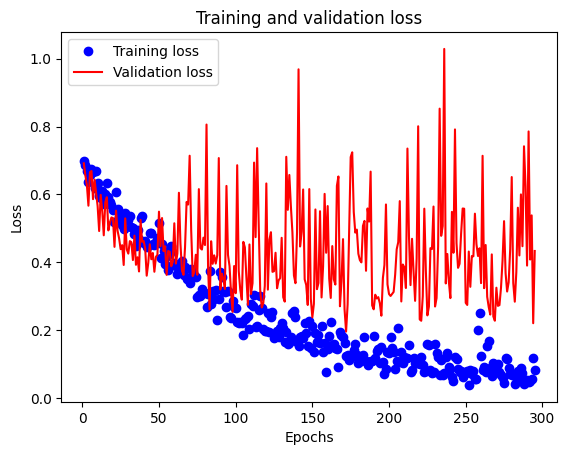

In [ ]:
loss_vals = history_dict['loss']
val_loss_vals = history_dict['val_loss']

epochs = range(1, len(loss_vals) + 1) # range of X is to the # of epochs
plt.plot(epochs, loss_vals, 'bo', label='Training loss')
plt.plot(epochs, val_loss_vals, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Wow, the loss curve was bouncing all over the place!

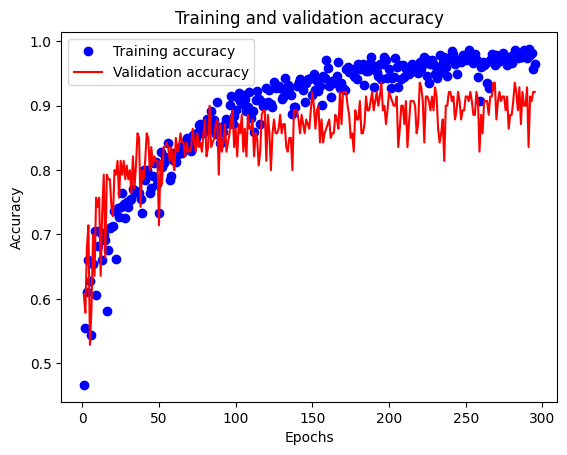

In [ ]:
loss_vals = history_dict['accuracy']
val_loss_vals = history_dict['val_accuracy']

epochs = range(1, len(loss_vals) + 1) # range of X is to the # of epochs
plt.plot(epochs, loss_vals, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss_vals, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Looks like it converged!

# Evaluate Preds

In [ ]:
batches = 0
my_results = pd.DataFrame(columns=['Actual', 'Predicted'])

for x_val, y_val in test_generator:
    batches += 1
    y_pred = model.predict(x_val)  # Get probability outputs
    y_pred = (y_pred > 0.5).astype(int)  # Convert to binary class

    tmp = pd.DataFrame({'Actual': y_val.flatten(), 'Predicted': y_pred.flatten()})  # Flatten arrays
    my_results = pd.concat([my_results, tmp])

    if batches >= test_steps_per_epoch:
        break  # Prevent infinite looping

my_results.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


<ipython-input-75-9c19914e554e>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  my_results = pd.concat([my_results, tmp])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Actual Predicted
0     0.0         0
1     1.0         1
2     1.0         1
3     0.0         0
4     0.0         0

In [ ]:
my_results['Actual'] = pd.to_numeric(my_results['Actual'])
my_results['Predicted'] = pd.to_numeric(my_results['Predicted'])

my_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     140 non-null    float32
 1   Predicted  140 non-null    int64  
dtypes: float32(1), int64(1)
memory usage: 6.8 KB


# Error Metrics

In [ ]:
confusion_matrix(my_results['Actual'], my_results['Predicted'])

array([[64,  6],
       [ 3, 67]])

This is a good sign :) Most of the data is along the diagonal.

In [ ]:
# Classification report for both partitions
print("Classification Report:")
print(classification_report(my_results['Actual'], my_results['Predicted']))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93        70
         1.0       0.92      0.96      0.94        70

    accuracy                           0.94       140
   macro avg       0.94      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140



This isn't bad compared to my initial results! The performance is relatively the same for wolf and husky, and the batch classes are even.

In [ ]:
# Save the model for later!
model_path = "/content/drive/MyDrive/data-science-projects/my_simple_convnet_husky_v_wolf_classifier.keras"
model.save(model_path)
print(f"Model saved to: {model_path}")

Model saved to: /content/drive/MyDrive/data-science-projects/my_simple_convnet_husky_v_wolf_classifier.keras


# Fine-tuning

With such impressive results from the simplier model, I am curious if I can beat these results via fine-tuning! I will load in `ResNet50` and freeze the base for feature extraction. After, I will fine-tine the model using the same data augmentation and see if I can improve predictive performance.

In [11]:
from keras import backend as K
K.clear_session()

In [12]:
from keras.applications import ResNet50

conv_base = ResNet50(weights='imagenet',
                     include_top=False,
                     input_shape=(150,150, 3))

conv_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 156, 156, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 75, 75, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 75, 75, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 75, 75, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 77, 77, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 38, 38, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 38, 38, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 38, 38, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 38, 38, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 38, 38, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

## Architecture

In [13]:
# Freeze the convolutional base during feature extraction
conv_base.trainable = False

In [14]:
model = Sequential()
model.add(conv_base)  # Add pre-trained ResNet50 as base
model.add(layers.Flatten())
model.add(layers.Dropout(0.50))
model.add(layers.Dense(1064, activation='relu')) # Fully connected layer
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 5, 5, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1064)                │      54,477,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1064)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         545,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 78,742,441 (300.38 MB)

 Trainable params: 55,154,729 (210.40 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Even more trainable parameters!

In [15]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Compile Network

### Feature extraction

In [16]:
es = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=50, # do not need a large value during feature extraction
    restore_best_weights=True
)

In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    callbacks=[es],
    epochs=100000,
    validation_data=test_generator,
    validation_steps=test_steps_per_epoch
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100000
11/11 ━━━━━━━━━━━━━━━━━━━━ 107s 9s/step - accuracy: 0.5248 - loss: 2.3046 - val_accuracy: 0.5000 - val_loss: 0.9191
Epoch 2/100000
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4634 - loss: 0.8687 - val_accuracy: 0.5000 - val_loss: 0.6998
Epoch 3/100000
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5205 - loss: 0.7281 - val_accuracy: 0.5000 - val_loss: 0.6960
Epoch 4/100000
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5175 - loss: 0.7096 - val_accuracy: 0.5000 - val_loss: 0.7437
Epoch 5/100000
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5344 - loss: 0.7042 - val_accuracy: 0.5071 - val_loss: 0.6704
Epoch 6/100000
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5393 - loss: 0.6935 - val_accuracy: 0.6214 - val_loss: 0.6586
Epoch 7/100000
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5330 - loss: 0.7062 - val_accuracy: 0.5214 - val_loss: 0.6758
Epoch 8/100000
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5814 - loss: 0.6784 -

In [24]:
es = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=100,
    restore_best_weights=True
)

### Fine-Tuning

In [25]:
conv_base.trainable = True
for layer in conv_base.layers[:-10]: # Unfreeze last 10 layers for fine-tuning
    layer.trainable = False

# Allow batch statistics to update
for layer in conv_base.layers:
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# Define Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy', # Reduce LR based on validation accuracy
    factor=0.5, # Reduce LR by 50% when triggered
    patience=20, # Wait 10 epochs before reducing
    verbose=2, # Print message when reducing LR
    min_lr=1e-8 # minimum learning rate limit
)

# Recompile
model.compile(optimizer=Adam(learning_rate=1e-5), # Low learning rate for fine-tuning
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fine-tuning
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    callbacks=[es],
    epochs=100000,
    validation_data=test_generator,
    validation_steps=test_steps_per_epoch
)

Epoch 1/100000
11/11 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.4980 - loss: 3.4749 - val_accuracy: 0.7500 - val_loss: 0.5905
Epoch 2/100000
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4886 - loss: 2.7174 - val_accuracy: 0.6929 - val_loss: 0.6481
Epoch 3/100000
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5664 - loss: 2.0811 - val_accuracy: 0.7000 - val_loss: 0.6683
Epoch 4/100000
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5883 - loss: 1.2546 - val_accuracy: 0.6071 - val_loss: 0.6909
Epoch 5/100000
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5676 - loss: 1.1702 - val_accuracy: 0.5857 - val_loss: 0.7138
Epoch 6/100000
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6482 - loss: 0.9666 - val_accuracy: 0.5500 - val_loss: 0.7206
Epoch 7/100000
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5601 - loss: 1.0658 - val_accuracy: 0.5357 - val_loss: 0.7184
Epoch 8/100000
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6615 - loss: 0.7902 - 

In [ ]:
history_dict = history_finetune.history
history_dict.keys()

## Learning Curves try \#2

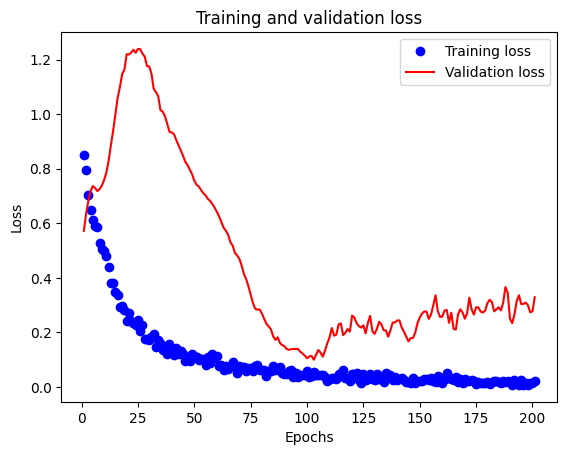

In [90]:
loss_vals = history_dict['loss']
val_loss_vals = history_dict['val_loss']

epochs = range(1, len(loss_vals) + 1) # range of X is to the # of epochs
plt.plot(epochs, loss_vals, 'bo', label='Training loss')
plt.plot(epochs, val_loss_vals, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

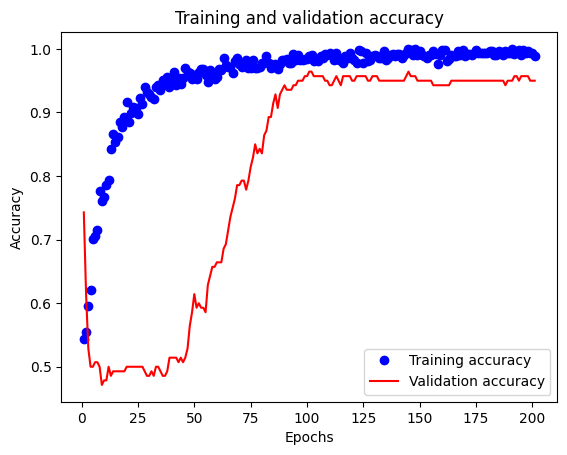

In [91]:
loss_vals = history_dict['accuracy']
val_loss_vals = history_dict['val_accuracy']

epochs = range(1, len(loss_vals) + 1) # range of X is to the # of epochs
plt.plot(epochs, loss_vals, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss_vals, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Wow! Look at these beautiful curves 🙂 There is a big drop and later recovery❕

## Generate predictions for fine-tuned ResNet50 network

In [92]:
batches = 0
my_results = pd.DataFrame(columns=['Actual', 'Predicted'])

for x_val, y_val in test_generator:
    batches += 1
    y_pred = model.predict(x_val)
    y_pred = (y_pred > 0.5).astype(int)

    tmp = pd.DataFrame({'Actual': y_val.flatten(), 'Predicted': y_pred.flatten()})
    my_results = pd.concat([my_results, tmp])

    if batches >= test_steps_per_epoch:
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


<ipython-input-92-360065f606a5>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  my_results = pd.concat([my_results, tmp])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [93]:
my_results.sample(10)

Actual Predicted
2     1.0         1
9     0.0         0
6     1.0         1
9     1.0         1
6     0.0         0
7     0.0         0
2     1.0         1
3     1.0         1
0     0.0         0
7     0.0         0

## Error metrics \#2

In [94]:
my_results['Actual'] = pd.to_numeric(my_results['Actual'])
my_results['Predicted'] = pd.to_numeric(my_results['Predicted'])

confusion_matrix(my_results['Actual'], my_results['Predicted'])

array([[69,  1],
       [ 4, 66]])

*Even more data along the diagonal!*

In [95]:
# Classification report for both partitions
print("Classification Report:")
print(classification_report(my_results['Actual'], my_results['Predicted']))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        70
         1.0       0.99      0.94      0.96        70

    accuracy                           0.96       140
   macro avg       0.97      0.96      0.96       140
weighted avg       0.97      0.96      0.96       140



Nice!! Great accuracy and weighted F1 score for both classes, which is good because the test data was balanced.

# Save the model for later!

In [96]:
model_path = "/content/drive/MyDrive/data-science-projects/fine_tuned_resnet50_husky_v_wolf_classifier.keras"
model.save(model_path)
print(f"Model saved to: {model_path}")

Model saved to: /content/drive/MyDrive/data-science-projects/fine_tuned_resnet50_husky_v_wolf_classifier.keras


# Load saved model and test it on additional data!

In [5]:
loaded_model = load_model("/content/drive/MyDrive/data-science-projects/fine_tuned_resnet50_husky_v_wolf_classifier.keras")
print("Model loaded successfully!")
loaded_model.summary()

Model loaded successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 5, 5, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1064)                │      54,477,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1064)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         545,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,077,181 (755.60 MB)

 Trainable params: 59,667,369 (227.61 MB)

 Non-trainable params: 19,075,072 (72.77 MB)

 Optimizer params: 119,334,740 (455.23 MB)

# Preprocessing steps for image

In [6]:
def preprocess_image(img_path, target_size=(150, 150)): # same dimensions the model was trained on
    """Loads and preprocesses an image for ResNet50."""
    img = image.load_img(img_path, target_size=target_size)  # Load & Resize
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand to (1, 150, 150, 3)
    img_array /= 255.0  # Normalize pixel values the same as during training
    return img_array

# Generate prediction for images the model hasn't seen...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Class: Husky (Confidence: 0.9999)


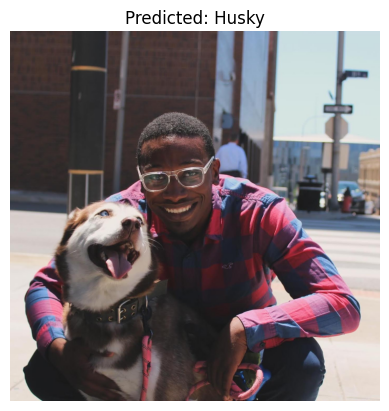

In [9]:
img_path = "/content/drive/MyDrive/data-science-projects/Thena-and-I.jpg"
img_array = preprocess_image(img_path)

# Generate pred and extract probability
prediction = loaded_model.predict(img_array)
probability = prediction[0][0]

# Extract and assign class labels
class_labels = list(train_generator.class_indices.keys())
negative_class, positive_class = class_labels  # Order matches training

# Determine predicted class and make confidence relative to class
if probability > 0.5:
    predicted_class = positive_class  # Class 1: Wolf
    confidence = probability  # Confidence in Class 1
else:
    predicted_class = negative_class  # Class 0: Husky
    confidence = 1 - probability  # Confidence in Class 0

# Print class, confidence, and display image
print(f"Predicted Class: {predicted_class} (Confidence: {confidence:.4f})")

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()

Me with my precious Thena nugget!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Class: Wolf (Confidence: 0.9998)


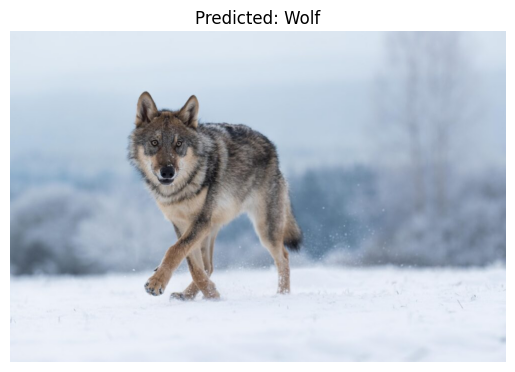

In [10]:
img_path = "/content/drive/MyDrive/data-science-projects/wolf.jpg"
img_array = preprocess_image(img_path)

prediction = loaded_model.predict(img_array)
probability = prediction[0][0]

if probability > 0.5:
    predicted_class = positive_class
    confidence = probability
else:
    predicted_class = negative_class
    confidence = 1 - probability

print(f"Predicted Class: {predicted_class} (Confidence: {confidence:.4f})")

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()

## Last three difficult images....

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Class: Wolf (Confidence: 0.9719)


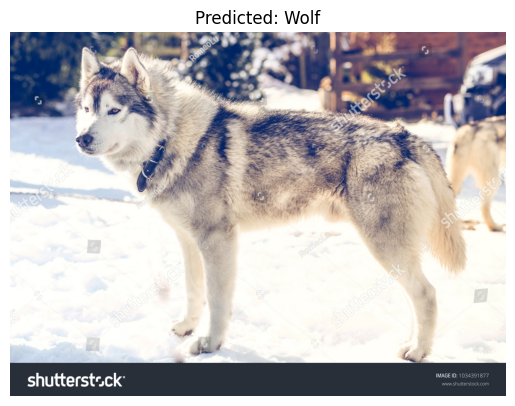

In [11]:
img_path = "/content/drive/MyDrive/data-science-projects/grey-wolf-husky-in-the-snow.jpg"
img_array = preprocess_image(img_path)

prediction = loaded_model.predict(img_array)
probability = prediction[0][0]

if probability > 0.5:
    predicted_class = positive_class
    confidence = probability
else:
    predicted_class = negative_class
    confidence = 1 - probability
print(f"Predicted Class: {predicted_class} (Confidence: {confidence:.4f})")

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()

Off but understandable! This husky looks very much like a wolf.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Class: Wolf (Confidence: 0.9999)


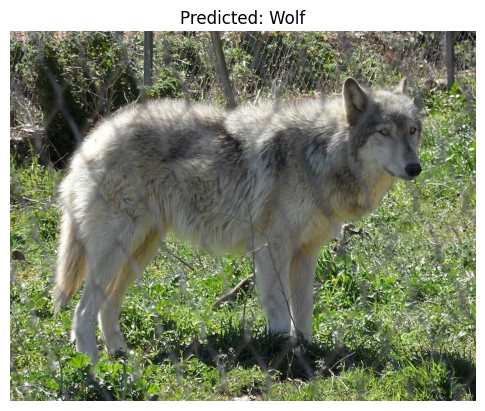

In [13]:
img_path = "/content/drive/MyDrive/data-science-projects/timber-wolf.jpg"
img_array = preprocess_image(img_path)

prediction = loaded_model.predict(img_array)
probability = prediction[0][0]

if probability > 0.5:
    predicted_class = positive_class
    confidence = probability
else:
    predicted_class = negative_class
    confidence = 1 - probability
print(f"Predicted Class: {predicted_class} (Confidence: {confidence:.4f})")

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()

This wolf has the fluffly coat of a husky and facial features of a wolf!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Class: Husky (Confidence: 0.8960)


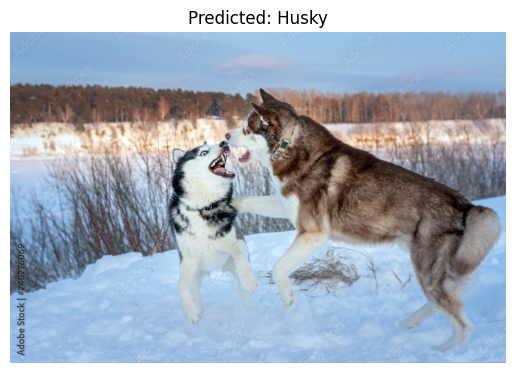

In [12]:
img_path = "/content/drive/MyDrive/data-science-projects/huskies.jpg"
img_array = preprocess_image(img_path)

prediction = loaded_model.predict(img_array)
probability = prediction[0][0]

if probability > 0.5:
    predicted_class = positive_class
    confidence = probability
else:
    predicted_class = negative_class
    confidence = 1 - probability
print(f"Predicted Class: {predicted_class} (Confidence: {confidence:.4f})")

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()

These are not bad at all! Two out of three were accurately predicted, and the one misclassified, even I did a double take when I first observed it.

# What did I learn?


---

1.   ***Simple can be Better***: I really enjoyed the puzzle of figuring out how to implement data augmentation and fine-tuning to improve model performance, but in the end, it didn't yield significantly better results. Both models generated the same predictions for the five additional test images, so it seems unlikely that the fine-tuned model's performance is meaningfully different or improved compared to the simpler model. Given that training the first model was notably faster than fine-tuning `ResNet50`, in practice, it may be more valuable to keep training simple if good results are achieved. In this project, I wanted to implement advanced strategies, but since the simpler network's accuracy and weighted F1 score were already at 94%, there wasn't much room for improvement.
2.   ***Importance of Quality and Quantity***: I predict that one reason the fine-tuned model completely plateaus around 95% accuracy is messy data—i.e., a few bad training and/or test images. With a small dataset of only 506 training and 140 test samples, there isn't much opportunity to learn finer details of the species across various appearances, or in other words, the more nuanced patterns that are hard to visually detect. I think implementing data augmentation was valuable to the modeling process and improved results, but increasing both the sample size and the quality of images could push accuracy beyond 96%. As an evaluation step, it would be interesting to audit which images are causing issues with accurately classifying the species.
3.   ***Modeling Patience***: This project provided good experience in the art of modeling. Initially, I had a simple model that achieved 77% accuracy, while the fine-tuned model achieved 83%. I was feeling good about those results, but once I tried to run the entire script, the simple and fine-tuned model results were not converging and stayed around 50%. After taking multiple breaks to refresh my mind, I experimented with different model architectures, but performance stubbornly remained around 50% accuracy. Luckily, I had set the patience high on the fine-tuned model because I was tired and feeling defeated when I left it running. When I glanced back at the network later, the validation accuracy was in the 90s. The learning curves paint an interesting picture—initialization provided a good result, but the model quickly began to overfit and the learning curves diverged drastically. However, around 60 epochs or so, recognizable patterns emerged, and model accuracy shot up rapidly. I then reran the simple model using the same dense (fully connected) layers that I had attached to the `ResNet50` convnet base. To my surprise, the simple model was capable of breaking through the 90% accuracy threshold!
4.   ***Difference in Prediction Confidence***: One thing I discovered is that the simpler convolutional network's predictions were the same for the additional tested images; however, the confidence was lower, as evidenced below. Even though the accuracy and weighted F1 score between my simpler convnet and the fine-tuned model differed by only 0.02 or 2%, the latter was more confident about its predictions.

1. Thena and I:

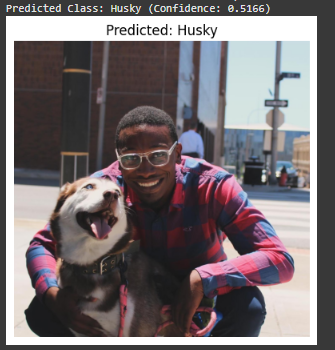

2. Wolf:

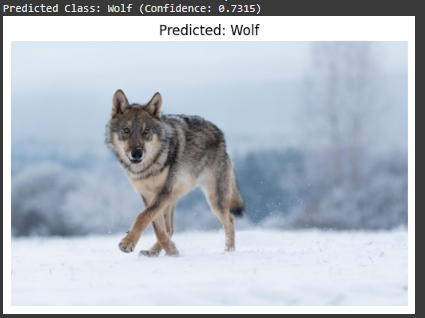
